# zhsegment: default program

In [1609]:
from zhsegment import *
import sys
import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Run the default solution on dev

In [1336]:
Pw = Pdist(data=datafile("../data/count_1w.txt"))
segmenter = Segment(Pw) # note that the default solution for this homework ignores the unigram counts
output_full = []
with open("../data/input/dev.txt") as f:
    for line in f:
        output = " ".join(segmenter.segment(line.strip(), default=True))
        output_full.append(output)
        
print("\n".join(output_full[:3])) # print out the first three lines of output as a sanity check

中 美 在 沪 签 订 高 科 技 合 作 协 议
新 华 社 上 海 八 月 三 十 一 日 电 （ 记 者 白 国 良 、 夏 儒 阁 ）
“ 中 美 合 作 高 科 技 项 目 签 字 仪 式 ” 今 天 在 上 海 举 行 。


In [726]:
# Add hw1 path to be able to import 
hw1_path = '/'.join(os.getcwd().split('/')[:-1])
sys.path.append(hw1_path)

## Evaluate the default output

In [1305]:
from zhsegment_check import fscore
with open('../data/reference/dev.out', 'r') as refh:
    ref_data = [str(x).strip() for x in refh.read().splitlines()]
    tally = fscore(ref_data, output_full)
    print("score: {:.2f}".format(tally), file=sys.stderr)


score: 0.27


## Documentation

Write some beautiful documentation of your program here.

## Analysis

Do some analysis of the results. What ideas did you try? What worked and what did not?

#### For the iterative algorithm, we follow these steps:
1. Initialize heap with segments at position 0 (with valid words and Unknown words)
2. Iteratively fill the memoization table by:
       - popping values from the heap
       - calculating probability of the segmented sentence as probability(previous word) + probability(current word)
       - storing the new probability in the table only if it is higher than the already stored one
       - populating the heap with the rest of the new words, which do not already exist in the heap
3. Reconstruct the final segmentation by following the back pointer of the last entry in the memoization table

### Trying the unigram model on english words

In [1584]:
Pw = Pdist(data=datafile("../../hw0/ensegment/data/count_1w.txt"), missingfn=(lambda k, N: 10./(N * 1000**(len(k)))))
segmenter = Segment(Pw)
output_full = []
with open("../../hw0/ensegment/data/input/test.txt") as f:
    for line in f:
        output = " ".join(segmenter.segment(line.strip(), default=False))
        output_full.append(output)

print("\n".join(output_full)) # print out the first three lines of output as a sanity check

how to break up in 5 words
what makes god smile
10 peopl e who mean alot to me
worst day in 4 words
love story in 5 words
top 3 fav our it e comic s
10 break up lines
thing s that make you smile
best fema leath let e
worst boss in 5 words
now is the time for all good
it is a truth univ er sally ac knowl edged
when in the cours e of human event sit be comes neces sary
it was ab right cold day in april and the clock s were stri king thir teen
it was the best of times it was the worst of times it was the age of w is dom it was the age of fool ish ness
as greg or samsa awoke one morn ing from un easy dream she found him self trans for med in his bed into a gig antic in sect
in a hole in the g round there lived a hobb it not a nasty dirty wet hole fill ed with the ends of worms and an oozy smell nor yet a dry bare sandy hole with no thing in it to sit down on or to eat it was a hobb it hole and that means com fort
far out in the un chart ed back water s of the unf as hi on able end of the w

### Trying the unigram model on dev dataset.

In [1610]:
Pw = Pdist(data=datafile("../data/count_1w.txt"), missingfn=(lambda k, N: 10./(N * 1000**(len(k)))))
segmenter = Segment(Pw) # note that the default solution for this homework ignores the unigram counts
output_full = []
with open("../data/input/dev.txt") as f:
    for line in f:
        output = " ".join(segmenter.segment(line.strip(), default=False))
        output_full.append(output)
        
print("\n".join(output_full[:3])) # print out the first three lines of output as a sanity check
with open('../data/reference/dev.out', 'r') as refh:
    ref_data = [str(x).strip() for x in refh.read().splitlines()]
    tally = fscore(ref_data, output_full)
    print("score: {:.2f}".format(tally), file=sys.stderr)

中 美 在 沪 签订 高 科技 合作 协议
新华社 上海 八月 三十一日 电 （ 记者 白国良 、 夏儒阁 ）
“ 中 美 合作 高 科技 项目 签字 仪式 ” 今天 在 上海 举行 。


score: 0.93


## Solution using Bigram model, along with Jelinek-Mercer smoothing
To make our model more generalizable for test data, we implement the combination of Bigram and Unigram models, along with Jelinek-Mercer smoothing next.
For this, we use the given word counts for Chinese Bigrams count_2w.txt to determine the Conditional probability and populate a dictionary as per the following formula:<br><br>
PML(Wi | Wi−1) = c(Wi−1, Wi) / c(Wi-1)<br><br>
where c(Wi−1, Wi) is the count of the bigram (Wi−1, Wi) in the Bigram text file, and c(Wi-1) is the count of the unigram (Wi-1).<br><br>
Then we apply Jelinek-Mercer Smoothing as follows:<br><br>
PJM(wi | wi−1) = lambda * PML(wi | wi−1) + (1 − lambda) * PML(wi)<br><br>

### Trying the bigram model on dev dataset

In [1589]:
Pw = Pdist(data=datafile("../data/count_1w.txt"), missingfn=(lambda k, N: 10./(N * 1000**(len(k)))))
Pwc = Pdist_cond(Pw, data=datafile("../data/count_2w.txt", mode='bigram'))
segmenter = Segment(Pw, Pwc, lambda_bigram=0.01) # note that the default solution for this homework ignores the unigram counts
output_full = []
with open("../data/input/dev.txt") as f:
    for line in f:
        output = " ".join(segmenter.segment(line.strip(), default=False))
        output_full.append(output)
        
print("\n".join(output_full[:3])) # print out the first three lines of output as a sanity check
with open('../data/reference/dev.out', 'r') as refh:
    ref_data = [str(x).strip() for x in refh.read().splitlines()]
    tally = fscore(ref_data, output_full)
    print("score: {:.2f}".format(tally), file=sys.stderr)

中 美 在 沪 签订 高 科技 合作 协议
新华社 上海 八月 三十一日 电 （ 记者 白国良 、 夏儒阁 ）
“ 中 美 合作 高 科技 项目 签字 仪式 ” 今天 在 上海 举行 。


score: 0.93


### Now we try to selcet a subset of data from 1 million Chinese datasets to create a second  dataset for our evaluation besides the dev set.

In [1294]:
# Select a subset of the 1M chinsese sentences dataset
import numpy as np
num_lines = 350
random_lines = set(np.random.choice(range(1000000), num_lines, replace=False))
million_sent_path = "../data/wseg_simplified_cn.txt"

subset_lines = []
with open(million_sent_path) as f:
    for i, line in enumerate(f):
        if i in random_lines:
            subset_lines.append(line)

### Comparing the distibution of the sentence lengths for test dataset and the dataset we created.
#### First one is for test data and second one is for the one we created

(array([104., 112.,  70.,  34.,  18.,   7.,   3.,   0.,   1.,   1.]),
 array([  4. ,  19.9,  35.8,  51.7,  67.6,  83.5,  99.4, 115.3, 131.2,
        147.1, 163. ]),
 <a list of 10 Patch objects>)

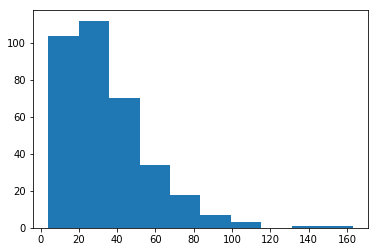

In [1295]:
# making sure the test data and the sample data have similar distribuations in terms of sentence length. 
sent_length = []
with open('../data/input/test.txt') as f:
    for line in f:
        sent_length.append(len(line))
plt.hist(sent_length)

(array([105., 123.,  75.,  35.,   5.,   5.,   1.,   0.,   0.,   1.]),
 array([  3. ,  39.9,  76.8, 113.7, 150.6, 187.5, 224.4, 261.3, 298.2,
        335.1, 372. ]),
 <a list of 10 Patch objects>)

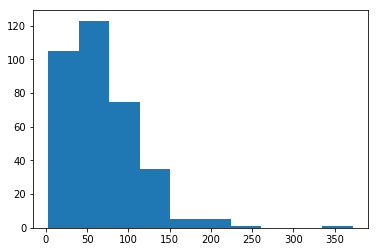

In [1296]:
sent_length = []
for line in subset_lines:
    sent_length.append(len(line))
plt.hist(sent_length)

### Sample sentences from the dataset we created

In [1297]:
subset_lines[:5]

['警方 立即 将 薛 文祥 与 薛 章和 列 入 侦查 重点 。\n',
 '2695×1559×1542mm 的 车身 尺寸 几乎 是 目 前 量 产 车 中 最小的 一 款 了。\n',
 '今天 呢 ， 我们 就 来 关注 这一 事件 。\n',
 '所以 适当的 时候 呢 ， 还 会 有 类似 歼十 这样 ，\n',
 '虽然 被掐头去尾 , 但 是 可以确定 是 同 一部 短 片 .\n']

### Next two cells will push the sentences into a file on which we evaluate our results on.

In [1298]:
# write this subset to a new reference file
million_sent_subset_path = "../data/reference/million_sent_sample.out"
with open(million_sent_subset_path, 'w') as f:
    for line in subset_lines:
        f.write(line)

In [1299]:
# remove the spaces in the selected lines and use this as an extra input for the model to evaluate
million_sent_subset_input_path = "../data/input/million_sent_sample.txt"
with open(million_sent_subset_input_path, 'w') as f:
    for line in subset_lines:
        f.write(''.join(line.split(' ')))
    

### These are some helper functions that we use for the grid search. The grid search is used for choosing lambda values for the smoothing.

In [1328]:
# helper functions for choosing the right lambda and delta parameters
def run_input_file(path):
    results = []
    with open(path) as f:
        for line in f:
            output = " ".join(segmenter.segment(line.strip(), default=False))
            results.append(output)
    return results

def evaluate_input_file(path, lines):
    with open(path, 'r') as refh:
        ref_data = [str(x).strip() for x in refh.read().splitlines()]
        tally = fscore(ref_data, lines)
        return tally


### Next two cells will create the file the count of triple words. This is used for the trigram model. 

In [1156]:
# Create a dictionary of all the trigrams
Pwc2 = {}
with open('../data/train.txt') as f:
    for line in f:
        tokens = line.split()
        tokens = ['<S>'] + tokens
        for i in range(2, len(tokens)):
            if (tokens[i-2], tokens[i-1], tokens[i]) in Pwc2:
                Pwc2[(tokens[i-2], tokens[i-1], tokens[i])] += 1
            else:
                Pwc2[(tokens[i-2], tokens[i-1], tokens[i])] = 1

In [1160]:
# Save the results of trigram counts into a file
with open('../data/count_3w.txt', 'w') as f:
    for k, v in Pwc2.items():
        f.write(k[0] + ' ' + k[1] + ' ' + k[2] + ' {}'.format(v) + '\n')

### Solution using trigram model, along with Jelinek-Mercer smoothing
We apply Jelinek-Mercer Smoothing, similar to our previous Bigram model, as follows:<br><br>
PJM(wi | wi−1, wi-2) = lambda1 * PML(wi | wi−1, wi-2) + (1 − lambda1) * { lambda2 * PML(wi | wi-1) + (1 - lambda2) * PML(wi) }<br><br>
We apply this while calculating probability for a segment with respect to the previous two segments in the input sequence and we make use of the trigram, bigram and the unigram word counts for this task.

### Trying the trigram model

In [1601]:
# Adding trigram
Pw = Pdist(data=datafile("../data/count_1w.txt"), missingfn=(lambda k, N: 10./(N * 1000**(len(k)))))
Pwc = Pdist_cond(Pw, data=datafile("../data/count_2w.txt", mode='bigram'))
Pwc2 = Pdist_cond_tri(Pwc, data=datafile("../data/count_3w.txt", mode='trigram'))
segmenter = Segment(Pw, Pwc, Pwc2, lambda_bigram=0.01, lambda_trigram=0.01) # note that the default solution for this homework ignores the unigram counts
output_full = []
with open("../data/input/dev.txt") as f:
    for line in f:
        output = " ".join(segmenter.segment(line.strip(), default=False))
        output_full.append(output)

print("\n".join(output_full[:3])) # print out the first three lines of output as a sanity check
with open('../data/reference/dev.out', 'r') as refh:
    ref_data = [str(x).strip() for x in refh.read().splitlines()]
    tally = fscore(ref_data, output_full)
    print("score: {:.2f}".format(tally), file=sys.stderr)

中 美 在 沪 签订 高 科技 合作 协议
新华社 上海 八月 三十一日 电 （ 记者 白国良 、 夏儒阁 ）
“ 中 美 合作 高 科技 项目 签字 仪式 ” 今天 在 上海 举行 。


score: 0.93


### We now use a grid search to find best values of lambda for the unigram, bigram and the trigram model based on the score on dev and the sample data we created.

In [1604]:
# Using grid search to find the best parameters
deltas = [1000, 5000, 10000, 20000]
lambda_bigram_vals = [0, 0.1, 0.4, 0.8, 0.9, 0.95]
lambda_trigram_vals = [0, 0.1, 0.4, 0.8, 0.9, 0.95]

for lambda_bigram in lambda_bigram_vals:
    for lambda_trigram in lambda_trigram_vals:
        for delta in deltas:
            Pw = Pdist(data=datafile("../data/count_1w.txt"), missingfn=(lambda k, N: 10./(N * delta**(len(k)))))
            Pwc = Pdist_cond(Pw, data=datafile("../data/count_2w.txt", mode='bigram'))
            Pwc2 = Pdist_cond_tri(Pwc, data=datafile("../data/count_3w.txt", mode='trigram'))
            segmenter = Segment(Pw, Pwc, Pwc2, lambda_bigram=lambda_bigram, lambda_trigram=lambda_trigram)
            # evaluate results on dev
            output_full = run_input_file("../data/input/dev.txt")
            tally_dev = evaluate_input_file('../data/reference/dev.out', output_full)
            # evaluate results on the sample sentences from 1 Million Chinese sentences
            output_full = run_input_file("../data/input/million_sent_sample.txt")
            tally_sample = evaluate_input_file('../data/reference/million_sent_sample.out', output_full)
            print('Testing lambda_bigram {}, lambda_trigram {} and delta {} ...'.format(lambda_bigram, lambda_trigram, delta))
            print('dev score: {} and sample data score: {}'.format(tally_dev, tally_sample))
            print('----------')

Testing lambda_bigram 0, lambda_trigram 0 and delta 1000 ...
dev score: 0.9264056733482885 and sample data score: 0.7862988384371701
----------
Testing lambda_bigram 0, lambda_trigram 0 and delta 5000 ...
dev score: 0.9269485188380788 and sample data score: 0.7984057598354333
----------
Testing lambda_bigram 0, lambda_trigram 0 and delta 10000 ...
dev score: 0.9260907003444316 and sample data score: 0.7956851981872726
----------
Testing lambda_bigram 0, lambda_trigram 0 and delta 20000 ...
dev score: 0.9176840151352895 and sample data score: 0.7936911727295853
----------
Testing lambda_bigram 0, lambda_trigram 0.1 and delta 1000 ...
dev score: 0.9243563783627423 and sample data score: 0.7880309135345795
----------
Testing lambda_bigram 0, lambda_trigram 0.1 and delta 5000 ...
dev score: 0.92517789118091 and sample data score: 0.7990741336076641
----------
Testing lambda_bigram 0, lambda_trigram 0.1 and delta 10000 ...
dev score: 0.9244010902309568 and sample data score: 0.7960879570442

Testing lambda_bigram 0.4, lambda_trigram 0.4 and delta 1000 ...
dev score: 0.9198078882258768 and sample data score: 0.7792744731928515
----------
Testing lambda_bigram 0.4, lambda_trigram 0.4 and delta 5000 ...
dev score: 0.9259579371938922 and sample data score: 0.7953632949099857
----------
Testing lambda_bigram 0.4, lambda_trigram 0.4 and delta 10000 ...
dev score: 0.9246801782377462 and sample data score: 0.7979681069958847
----------
Testing lambda_bigram 0.4, lambda_trigram 0.4 and delta 20000 ...
dev score: 0.9236285406955899 and sample data score: 0.7960058887537604
----------
Testing lambda_bigram 0.4, lambda_trigram 0.8 and delta 1000 ...
dev score: 0.910943340907425 and sample data score: 0.7553278688524591
----------
Testing lambda_bigram 0.4, lambda_trigram 0.8 and delta 5000 ...
dev score: 0.9219745222929938 and sample data score: 0.7854080084438286
----------
Testing lambda_bigram 0.4, lambda_trigram 0.8 and delta 10000 ...
dev score: 0.9247404844290659 and sample data

Testing lambda_bigram 0.9, lambda_trigram 0.9 and delta 1000 ...
dev score: 0.872049315892347 and sample data score: 0.6659908768373036
----------
Testing lambda_bigram 0.9, lambda_trigram 0.9 and delta 5000 ...
dev score: 0.9048458149779735 and sample data score: 0.7519094380796508
----------
Testing lambda_bigram 0.9, lambda_trigram 0.9 and delta 10000 ...
dev score: 0.9111208406304729 and sample data score: 0.7658831430490263
----------
Testing lambda_bigram 0.9, lambda_trigram 0.9 and delta 20000 ...
dev score: 0.9152493094926588 and sample data score: 0.7754423307170414
----------
Testing lambda_bigram 0.9, lambda_trigram 0.95 and delta 1000 ...
dev score: 0.8630033303057826 and sample data score: 0.6465669014084507
----------
Testing lambda_bigram 0.9, lambda_trigram 0.95 and delta 5000 ...
dev score: 0.8992556562753334 and sample data score: 0.7330473290893994
----------
Testing lambda_bigram 0.9, lambda_trigram 0.95 and delta 10000 ...
dev score: 0.9046501393574886 and sample d

### By naroowing down the search in the next two cells we find the best lambdas.

In [1605]:
# Narrowing down the search for best parameters.
deltas = [3700, 4000, 4300, 4600, 4900, 5200]
lambda_bigram_vals = [0.1]
lambda_trigram_vals = [0.1]

for i in range(len(lambda_bigram_vals)):
    lambda_bigram = lambda_bigram_vals[i]
    lambda_trigram = lambda_trigram_vals[i]
    for delta in deltas:
        Pw = Pdist(data=datafile("../data/count_1w.txt"), missingfn=(lambda k, N: 10./(N * delta**(len(k)))))
        Pwc = Pdist_cond(Pw, data=datafile("../data/count_2w.txt", mode='bigram'))
        Pwc2 = Pdist_cond_tri(Pwc, data=datafile("../data/count_3w.txt", mode='trigram'))
        segmenter = Segment(Pw, Pwc, Pwc2, lambda_bigram=lambda_bigram, lambda_trigram=lambda_trigram)
        # evaluate results on dev
        output_full = run_input_file("../data/input/dev.txt")
        tally_dev = evaluate_input_file('../data/reference/dev.out', output_full)
        # evaluate results on the sample sentences from 1 Million Chinese sentences
        output_full = run_input_file("../data/input/million_sent_sample.txt")
        tally_sample = evaluate_input_file('../data/reference/million_sent_sample.out', output_full)
        print('Testing lambda_bigram {}, lambda_trigram {} and delta {} ...'.format(lambda_bigram, lambda_trigram, delta))
        print('dev score: {} and sample data score: {}'.format(tally_dev, tally_sample))
        print('----------')

Testing lambda_bigram 0.1, lambda_trigram 0.1 and delta 3700 ...
dev score: 0.9254010502841523 and sample data score: 0.7987891279144661
----------
Testing lambda_bigram 0.1, lambda_trigram 0.1 and delta 4000 ...
dev score: 0.9254997842657846 and sample data score: 0.7995108450794877
----------
Testing lambda_bigram 0.1, lambda_trigram 0.1 and delta 4300 ...
dev score: 0.9254997842657846 and sample data score: 0.7992536353107708
----------
Testing lambda_bigram 0.1, lambda_trigram 0.1 and delta 4600 ...
dev score: 0.9254997842657846 and sample data score: 0.7991510708084122
----------
Testing lambda_bigram 0.1, lambda_trigram 0.1 and delta 4900 ...
dev score: 0.9254997842657846 and sample data score: 0.7992282958199356
----------
Testing lambda_bigram 0.1, lambda_trigram 0.1 and delta 5200 ...
dev score: 0.9255770475300209 and sample data score: 0.7994087023587635
----------


In [1606]:
# Narrowing down the search for best parameters.
deltas = [5200, 5500, 6000]
lambda_bigram_vals = [0.1]
lambda_trigram_vals = [0.1]

for i in range(len(lambda_bigram_vals)):
    lambda_bigram = lambda_bigram_vals[i]
    lambda_trigram = lambda_trigram_vals[i]
    for delta in deltas:
        Pw = Pdist(data=datafile("../data/count_1w.txt"), missingfn=(lambda k, N: 10./(N * delta**(len(k)))))
        Pwc = Pdist_cond(Pw, data=datafile("../data/count_2w.txt", mode='bigram'))
        Pwc2 = Pdist_cond_tri(Pwc, data=datafile("../data/count_3w.txt", mode='trigram'))
        segmenter = Segment(Pw, Pwc, Pwc2, lambda_bigram=lambda_bigram, lambda_trigram=lambda_trigram)
        # evaluate results on dev
        output_full = run_input_file("../data/input/dev.txt")
        tally_dev = evaluate_input_file('../data/reference/dev.out', output_full)
        # evaluate results on the sample sentences from 1 Million Chinese sentences
        output_full = run_input_file("../data/input/million_sent_sample.txt")
        tally_sample = evaluate_input_file('../data/reference/million_sent_sample.out', output_full)
        print('Testing lambda_bigram {}, lambda_trigram {} and delta {} ...'.format(lambda_bigram, lambda_trigram, delta))
        print('dev score: {} and sample data score: {}'.format(tally_dev, tally_sample))
        print('----------')

Testing lambda_bigram 0.1, lambda_trigram 0.1 and delta 5200 ...
dev score: 0.9255770475300209 and sample data score: 0.7994087023587635
----------
Testing lambda_bigram 0.1, lambda_trigram 0.1 and delta 5500 ...
dev score: 0.9255212077641984 and sample data score: 0.7996915365336418
----------
Testing lambda_bigram 0.1, lambda_trigram 0.1 and delta 6000 ...
dev score: 0.925343105554358 and sample data score: 0.7985616130482246
----------


#### The above grid search shows that the model gives the highest score when we use the following parameters:<br><br>
delta (smoothing parameter for unigram) = 5500<br>
lambda for bigram = 0.1<br>
lambda for trigram = 0.1<br>